<a href="https://colab.research.google.com/github/pawanpal481/health-/blob/main/health_and_sleep_statisics_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(f'/content/Health_Sleep_Statistics (1) (1).csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [10]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()
x=df[['Age']]
y=df[['Sleep Quality']]
age_sleep_quality_model.fit(x,y)

LinearRegression()

In [11]:
age_sleep_quality_model.coef_

array([[-0.17408531]])

In [12]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
physiclal_activity_females=df[df['Gender']=='f']['Physical Activity Level']

In [13]:
t_sleep_quality, p_sleep_quality=stats.ttest_ind(sleep_quality_males, sleep_quality_females)
print(f"t_stats value for sleep Quality vs Gender :{t_sleep_quality:2f}" )
print(f"p_stats value for sleep Quality vs Gender :{ p_sleep_quality :2f}")

t_stats value for sleep Quality vs Gender :-14.320329
p_stats value for sleep Quality vs Gender :0.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [15]:
df.size

1200

In [16]:
df.columns.size

12

In [17]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [18]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [19]:
df.drop(['User ID'], axis = 1 ,inplace= True)

In [20]:
df.duplicated().sum()

np.int64(12)

## age vs sleep_quality

In [21]:
age_sleep_quality_corr=df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [22]:
age_sleep_quality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


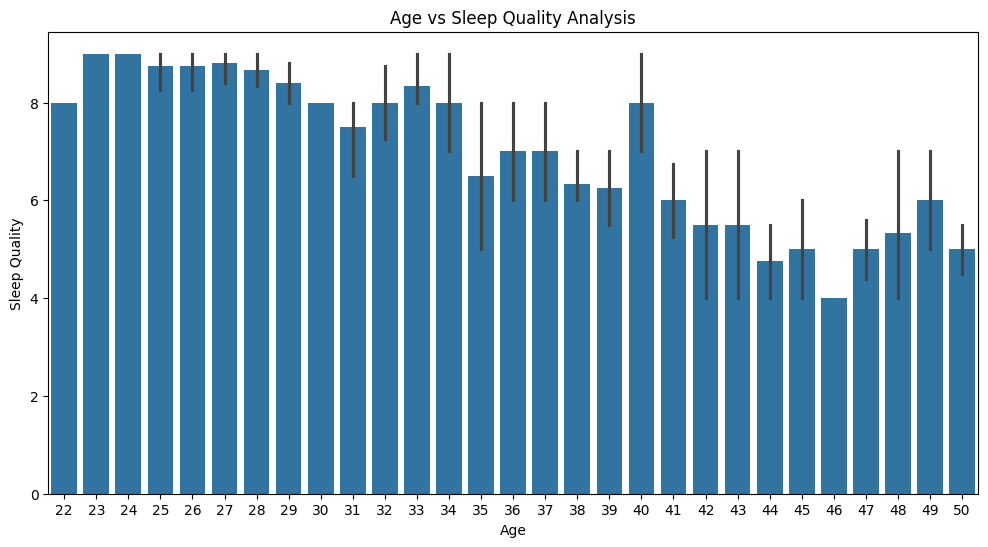

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.title("Age vs Sleep Quality Analysis")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()
x=df[['Age']]
y=df[['Sleep Quality']]
age_sleep_quality_model.fit(x,y)

LinearRegression()

In [25]:
age_sleep_quality_model.intercept_

array([13.26881202])

In [26]:
age_sleep_quality_model.coef_

array([[-0.17408531]])

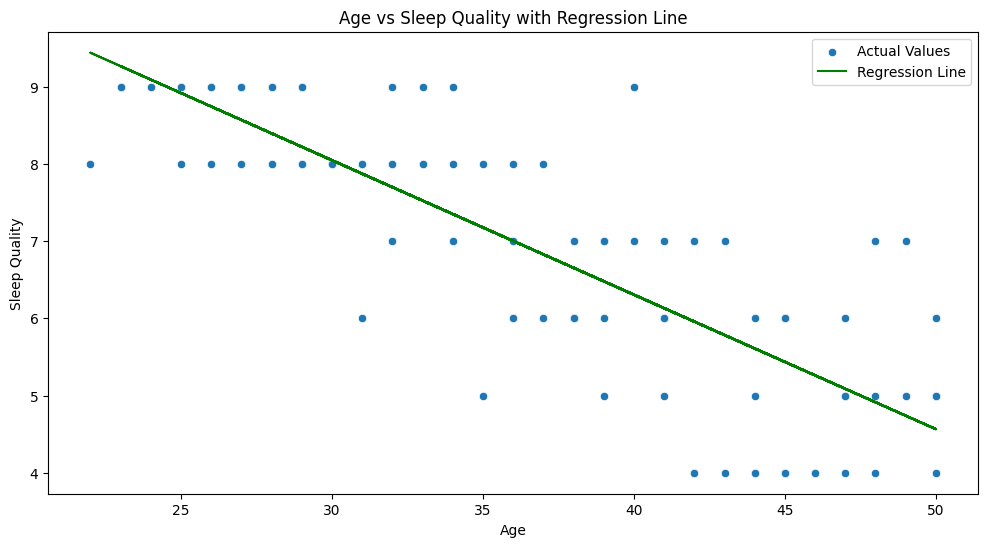

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Sleep Quality',data = df, label ='Actual Values')
Sleep_Quality_predictions = age_sleep_quality_model.predict(x)
plt.plot(x, Sleep_Quality_predictions, color='green', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.title('Age vs Sleep Quality with Regression Line')
plt.legend()
plt.show()

In [28]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [29]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [30]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

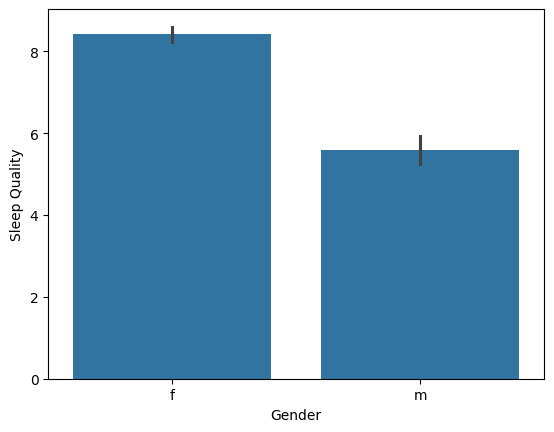

In [31]:
sns.barplot(x="Gender",y="Sleep Quality",data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

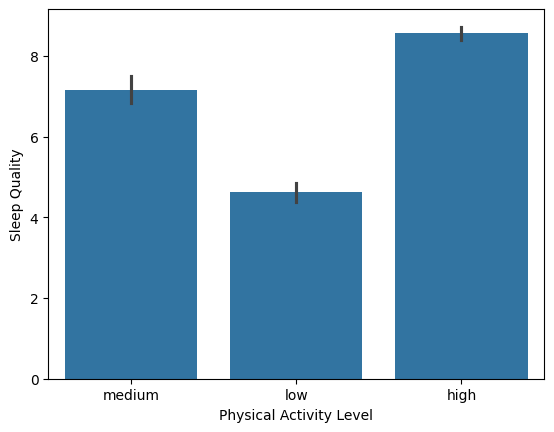

In [32]:
sns.barplot(x="Physical Activity Level",y="Sleep Quality",data=df)

In [33]:
custom_codes={'low':1,'medium':2,'high':3}
df['Physical Activity Level']=df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

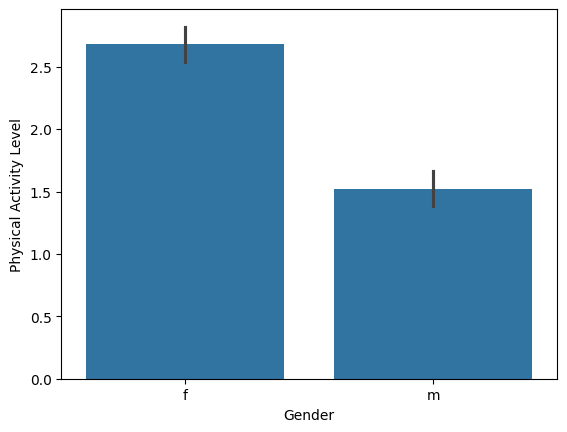

In [34]:
sns.barplot(x='Gender', y='Physical Activity Level',data=df)

In [35]:
   from scipy import stats
   sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
   sleep_quality_females=df[df['Gender'] == 'f']['Sleep Quality']

   physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
   physiclal_activity_females=df[df['Gender']=='f']['Physical Activity Level']


In [38]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
physiclal_activity_females=df[df['Gender']=='f']['Physical Activity Level']

In [39]:
import pandas as pd
from scipy import stats

In [40]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
physiclal_activity_females=df[df['Gender']=='f']['Physical Activity Level']

Lets find out t and p values for Sleep Quality vs Gender  & physical Activty vs Gender

In [41]:
t_sleep_quality, p_sleep_quality=stats.ttest_ind(sleep_quality_males, sleep_quality_females)
print(f"t_stats value for sleep Quality vs Gender :{t_sleep_quality:2f}" )
print(f"p_stats value for sleep Quality vs Gender :{ p_sleep_quality :2f}")


t_stats value for sleep Quality vs Gender :-14.320329
p_stats value for sleep Quality vs Gender :0.000000


In [43]:
t_physical_activity,p_physical_activity=stats.ttest_ind(physical_activity_males,physiclal_activity_females)
print(f"t_stast value for physical Activity vs Gender:{t_physical_activity:2f}")
print(f"p_stast value for sleep Quality vs Gnder:{p_physical_activity:2f}")

t_stast value for physical Activity vs Gender:-10.976983
p_stast value for sleep Quality vs Gnder:0.000000


## time of sleep & waking up vs sleep quality

In [4]:
df['Bedtime'].head()

NameError: name 'df' is not defined

In [5]:
import joblib

# Define the filename for the saved model
filename = 'sleep_duration_quality_model.pkl'

# Save the model to the file
joblib.dump(sleep_duration_quality_model, filename)

print(f"Model saved successfully to {filename}")

Model saved successfully to sleep_duration_quality_model.pkl


In [50]:
df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


In [55]:
def sleep_time_helper_function(str_time):
  h=str_time.split(":")[0]
  m=str_time.split(":")[1]
  return int(h) + int(m)/60

df['Bedtime']=df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time']=df['Wake-up Time'].apply(sleep_time_helper_function)

In [52]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [56]:
df['sleep Duration Hours']=(df['Wake-up Time']-df['Bedtime'])% 24
df['sleep Duration Hours'].head()

,sleep Duration Hours
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


In [57]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

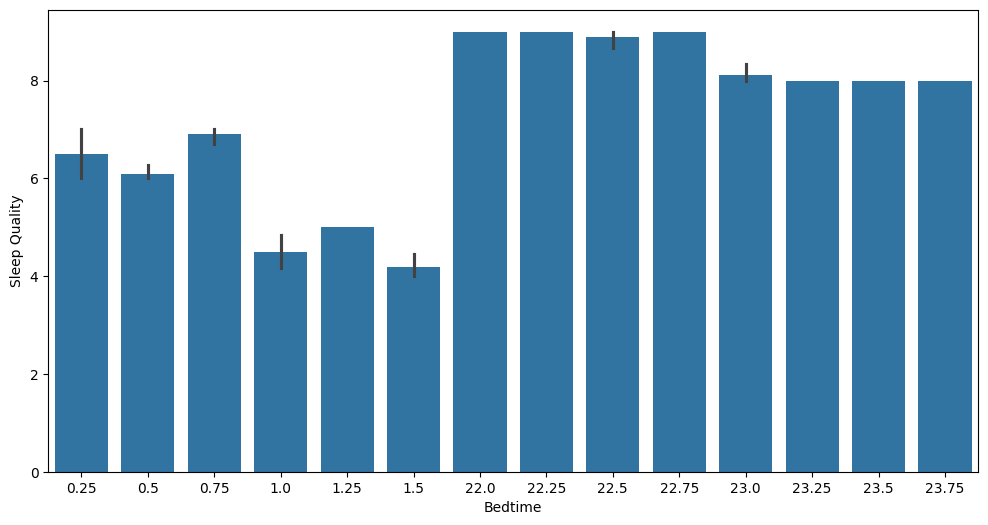

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x="Bedtime",y="Sleep Quality",data=df)

<Axes: xlabel='sleep Duration Hours', ylabel='Sleep Quality'>

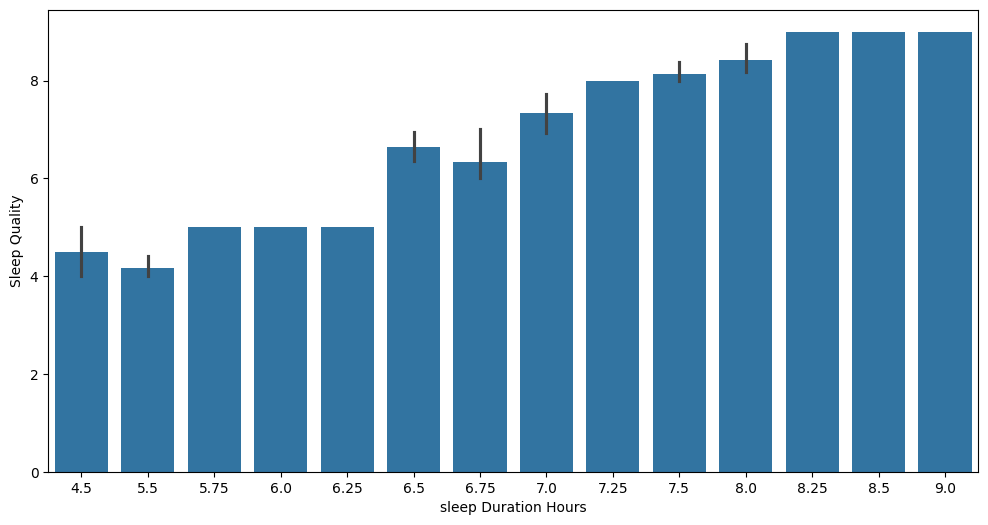

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x="sleep Duration Hours",y="Sleep Quality",data=df)